# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

*****
#### <li> 1. Is the distribution of body temperatures normal?

There are many ways to test the normality of data, here I use three approaches:
<li> Histogram
<li> Graphical test: QQ plot or normplot
<li> Back-of-the-envelope test using t statistic

(array([  4.,   6.,  15.,  26.,  30.,  30.,  15.,   1.,   2.,   1.]),
 array([  96.3 ,   96.75,   97.2 ,   97.65,   98.1 ,   98.55,   99.  ,
          99.45,   99.9 ,  100.35,  100.8 ]),
 <a list of 10 Patch objects>)

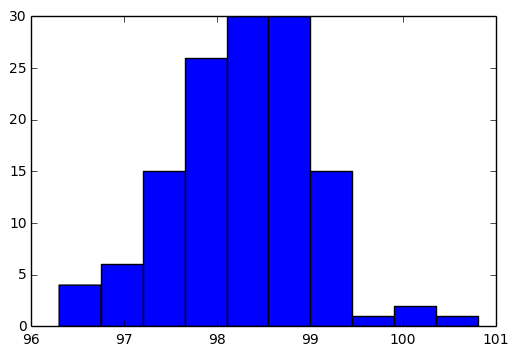

In [12]:
# histogram
import matplotlib.pyplot as plt

%matplotlib inline
t = df['temperature']
plt.hist(t)

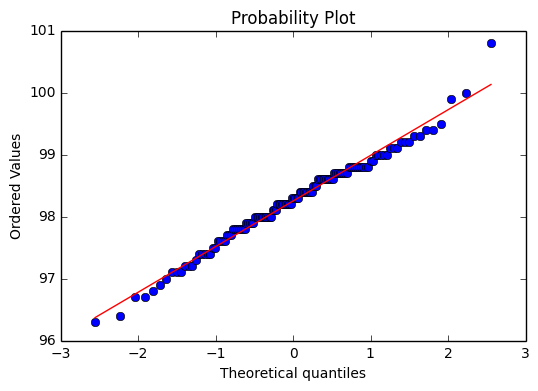

In [7]:
# QQ plot
import scipy.stats as stats

res = stats.probplot(t,plot=plt)

From histogram and QQ plot we can see it basically follows a normal distribution, except the right tail is a little heavier than expected distribution

In [28]:
#Back of envelope test using t statistic
import numpy as np
sigmas = abs((t-np.mean(t))/np.std(t,ddof=1))
N = len(sigmas)
theory = [0.64,0.95,0.99]
for i in range(1,4):
    print 'Probability of x_i < {} sigmas is:{},in theory is:{}'.format(i,sum(sigmas<i)/(N+0.0),theory[i-1])

Probability of x_i < 1 sigmas is:0.692307692308,in theory is:0.64
Probability of x_i < 2 sigmas is:0.946153846154,in theory is:0.95
Probability of x_i < 3 sigmas is:0.992307692308,in theory is:0.99


The back-of-envelope test tells us empirical chance of 1-sigma,2-sigma,3-sigma are very close to theoretical ones

******
#### <li> 2.Is the sample size large? Are the observations independent?

I think the sample size is large because it has more than 30 samples(113 samples in the dataset). Also the observations are independent because one person's body temperature has little influence on another one's.

*****
#### <li> 3.Is the true population mean really 98.6 degrees F?

I will use a one-sample t-test because I'm testing whether a hypothetical mean value is possible or not given the dataset, not checking if two datasets have the same mean value. 

Since I only have 130 samples, it's possible that population distribution is different from sample distribution of body temperatures, therefore I'll use t score instead of z score. 

Later I'll use z score to see how different these two scores are.

In [42]:
stats.t.sf(abs((np.mean(t)-98.6)/np.sqrt(np.var(t,ddof=1)/float(N))),N-1) * 2

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Since p value is very small we'll reject the hypothesis that the population mean = 98.6

In [47]:
(1-stats.norm.cdf(abs((np.mean(t)-98.6)/np.sqrt(np.var(t)/float(N))))) * 2

4.3523151749269573e-08

*****
#### <li> 4.At what temperature should we consider someone's temperature to be "abnormal"?

Set the threshold to 2 sigma then being abnormal means outside range(mean-2\*sigma,mean+2\*sigma)

In [55]:
sig = stats.norm.ppf(0.95)
print "Anyone's temperature outside range {} degrees F to {} degrees F is abnormal".format(np.mean(t)-sig*np.std(t,ddof=1),np.mean(t)+sig*np.std(t,ddof=1))

Anyone's temperature outside range 97.0432517925 degrees F to 99.455209746 degrees F is abnormal


*****
#### <li> 5.Is there a significant difference between males and females in normal temperature?

I use two-sample t-test to compare difference in distribution between males and females

In [59]:
male = df[df.gender=='M']['temperature']
female = df[df.gender=='F']['temperature']
N1,N2 = len(male),len(female)
stats.t.sf(abs((np.mean(male)-np.mean(female))/np.sqrt(np.var(male)/N1+np.var(female)/N2)),N-2)

0.011439639934782295

With confidence level = 95% we can say males and females have different temperature

In [62]:
print 'Is male mean temperature = 98.6 degrees F?'
print stats.t.sf(abs((np.mean(male)-98.6)/np.sqrt(np.var(male,ddof=1)/float(N1))),N1-1) * 2 
print 'Is female mean temperature = 98.6 degrees F?'
print stats.t.sf(abs((np.mean(female)-98.6)/np.sqrt(np.var(female,ddof=1)/float(N2))),N2-1) * 2 

Is male mean temperature = 98.6 degrees F?
3.08384031731e-07
Is female mean temperature = 98.6 degrees F?
0.0288804507897


*****
#### Conclusion

Statistical analysis revealed that the long believed normal human body temperature of 98.6F was wrong. Or at least we can be sure male mean temperature is not 98.6 degrees F, for female it could be 98.6F if we want to be 99% sure. But we can find out that female mean temperature is higher than male.